<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from datetime import datetime

## Load and Prepare Data

In [149]:
data=pd.read_csv("C:\\Users\\Surface Book\\Desktop\\Mini Project 2 - Regression (Bike Sharing Demand)\\train.csv")

## EDA

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [70]:
pd.isnull(data).sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Data Preprocessing

In [150]:
data['weekend']=np.where((data['workingday']==0) & (data['holiday']==0),1,0)
season=pd.get_dummies(data['season'],drop_first=True)
#df.rename(columns={"A": "a", "B": "c"})
data=pd.concat([data,season],axis=1)
data.rename(columns={2:'sum',3:'aut',4:'wint'},inplace=True)
weather=pd.get_dummies(data['weather'],drop_first=True)
data=pd.concat([data,weather],axis=1)
data.rename(columns={2:'mist',3:'snow',4:'rain'},inplace=True)

In [151]:
for index, rows in data.iterrows():
    data.loc[index,'time']=int((datetime.strptime(data.loc[index,'datetime'],'%Y-%m-%d %H:%M:%S')).hour)   

## Strorytelling - Visualization

<AxesSubplot:>

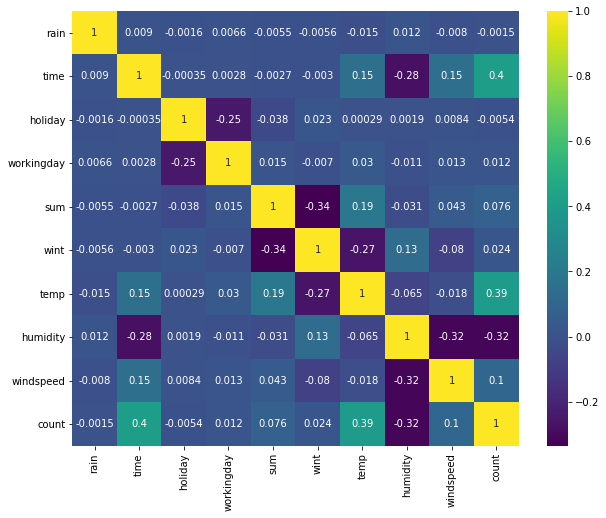

In [152]:
corr = data[['rain','time','holiday','workingday','sum','wint','temp','humidity','windspeed','count']].corr()
plt.figure(figsize=(10,8)) 
sb.heatmap(corr, cmap='viridis', annot=True)

## Train your model (Regression)

In [164]:
x=data[['temp','time','humidity','weekend','windspeed','mist','snow','rain','sum','aut','wint']]
#x=data[['time','temp','humidity','windspeed']]
y=data[['count']]

Mean Absolute Error: 107.89116144694817
Root Mean Squared Error: 146.46012484604657


<AxesSubplot:ylabel='Count'>

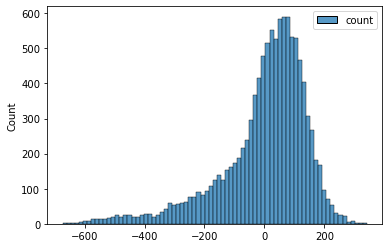

In [166]:
regressor=LinearRegression()
regressor.fit(x,y)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, regressor.predict(x)))  
#print('Mean Squared Error:', metrics.mean_squared_error(y, regressor.predict(x)))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, regressor.predict(x))))
sb.histplot(regressor.predict(x)-y)

## Test Result

In [169]:
testdata=pd.read_csv("C:\\Users\\Surface Book\\Desktop\\Mini Project 2 - Regression (Bike Sharing Demand)\\test.csv")
testdata['weekend']=np.where((testdata['workingday']==0) & (testdata['holiday']==0),1,0)
season=pd.get_dummies(testdata['season'],drop_first=True)
testdata=pd.concat([testdata,season],axis=1)
testdata.rename(columns={2:'sum',3:'aut',4:'wint'},inplace=True)
weather=pd.get_dummies(testdata['weather'],drop_first=True)
testdata=pd.concat([testdata,weather],axis=1)
testdata.rename(columns={2:'mist',3:'snow',4:'rain'},inplace=True)

for index, rows in testdata.iterrows():
    testdata.loc[index,'time']=int((datetime.strptime(testdata.loc[index,'datetime'],'%Y-%m-%d %H:%M:%S')).hour)   

In [171]:
x2=testdata[['temp','time','humidity','weekend','windspeed','mist','snow','rain','sum','aut','wint']]
pred_testData=regressor.predict(x2)
pred_testData

array([[ 14.61280434],
       [ 17.29107527],
       [ 24.70528457],
       ...,
       [159.28114935],
       [174.62831774],
       [163.37242025]])

## Send us the Result (Maktabkhoone)